In [0]:
import numpy as np
import pandas as pd
import cv2 
import os 
import tensorflow as tf
from PIL import Image

### load dataset

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

### Training set contains 50000 32x32 rgb images while Test set contains 10000 32x32 rgb images

In [61]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [62]:
#before we run our fit function we know that it requires 2 dimensional data, so we have to reshape our input
X_train = x_train.reshape(len(x_train), -1)
X_test = x_test.reshape(len(x_test), -1)


print(X_train.shape)

(50000, 3072)


### Flattening label arrays

In [0]:
Y_train = np.ravel(y_train)
Y_test = np.ravel(y_test)

### Convert images to gray scale

In [0]:
x_train_gray = []
for i in x_train:
  img = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  x_train_gray.append(img)

In [0]:
x_test_gray = []
for i in x_test:
  img = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  x_test_gray.append(img)

In [66]:
x_train_gray[0]

array([[ 62,  45,  47, ..., 128, 121, 120],
       [ 20,   0,   7, ...,  82,  77,  82],
       [ 23,   6,  24, ...,  78,  78,  68],
       ...,
       [152, 123, 125, ..., 117,  27,  32],
       [131, 104, 115, ..., 136,  58,  51],
       [139, 123, 130, ..., 174, 112,  90]], dtype=uint8)

### Normalize images (255 is maximum value in rgb)

In [0]:
x_train_gray = np.array(x_train_gray).astype('float32')
x_test_gray = np.array(x_test_gray).astype('float32')
x_train_gray /=255.0
x_test_gray /= 255.0

In [68]:

X_train_gray = x_train_gray.reshape(len(x_train_gray), -1).astype('float32')
X_test_gray = x_test_gray.reshape(len(x_test_gray), -1).astype('float32')


print(X_train_gray.shape)

(50000, 1024)


In [69]:
x_train_gray[0]

array([[0.24313726, 0.1764706 , 0.18431373, ..., 0.5019608 , 0.4745098 ,
        0.47058824],
       [0.07843138, 0.        , 0.02745098, ..., 0.32156864, 0.3019608 ,
        0.32156864],
       [0.09019608, 0.02352941, 0.09411765, ..., 0.30588236, 0.30588236,
        0.26666668],
       ...,
       [0.59607846, 0.48235294, 0.49019608, ..., 0.45882353, 0.10588235,
        0.1254902 ],
       [0.5137255 , 0.40784314, 0.4509804 , ..., 0.53333336, 0.22745098,
        0.2       ],
       [0.54509807, 0.48235294, 0.50980395, ..., 0.68235296, 0.4392157 ,
        0.3529412 ]], dtype=float32)

In [0]:
from sklearn.linear_model import LogisticRegression

### Define logistic regression model

In [0]:
logisticRegr = LogisticRegression(max_iter = 500, n_jobs = 6, solver = 'lbfgs', multi_class = 'multinomial')

### Fitting training set to data

In [72]:
logisticRegr.fit(X_train_gray, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=6, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting classes on testset

In [0]:
predictions = logisticRegr.predict(X_test_gray)

In [74]:
score = logisticRegr.score(X_test_gray, Y_test)
print(score)

0.2929


In [75]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.34      0.37      0.35      1000
  automobile       0.35      0.37      0.36      1000
        bird       0.23      0.20      0.21      1000
         cat       0.20      0.14      0.17      1000
        deer       0.22      0.18      0.20      1000
         dog       0.27      0.28      0.28      1000
        frog       0.26      0.29      0.27      1000
       horse       0.28      0.28      0.28      1000
        ship       0.34      0.39      0.37      1000
       truck       0.37      0.43      0.40      1000

    accuracy                           0.29     10000
   macro avg       0.29      0.29      0.29     10000
weighted avg       0.29      0.29      0.29     10000



In [0]:
import seaborn as sns
from sklearn import metrics

### Creating confusion matrix and visualizing

In [0]:
cm = metrics.confusion_matrix(Y_test, predictions)

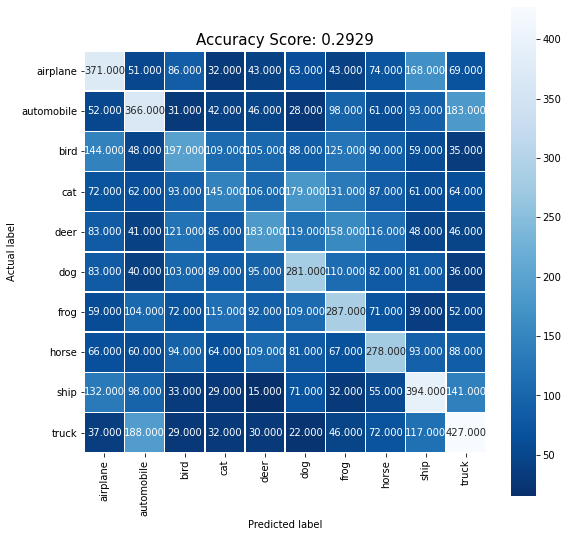

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels = classes, yticklabels=classes)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()